In [1]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 09:23:15) 
[Clang 10.0.1 (clang-1001.0.46.3)]


# Preliminaries

In [2]:
import heapq
import os, os.path
import pandas as pd
import pathlib
import numpy as np
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [5]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [6]:
src_dir = os.path.join(os.path.dirname(pathlib.Path.cwd()), 'src')
print(src_dir)

/Users/CBare/Documents/projects/pubmed_miner/src


In [7]:
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [8]:
from abstracts import fetch_abstracts

# Clustering on labeled Pubmed abstracts

## Read labeled gold set of Pubmed IDs

In [9]:
gold = pd.read_csv('../data/pmids_gold_set_labeled.txt', sep='\t',
                   header=None, names=['pmid', 'topic'])
print(gold.shape)
gold.head()

(103, 2)


,pmid,topic
0,30419345,Triple negative breast cancer
1,30419349,Triple negative breast cancer
2,30405852,Triple negative breast cancer
3,30397860,Triple negative breast cancer
4,30391405,Triple negative breast cancer


## Fetch abstracts

In [10]:
articles = fetch_abstracts(gold.pmid)
len(articles)

103

## Combine title and abstract and vectorize

In [11]:
texts = [a.title + ' ' + a.abstract for a in articles]

In [12]:
vectorizer = TfidfVectorizer(max_df=0.66,
                             max_features=1000,
                             min_df=2,
                             stop_words='english')
X = vectorizer.fit_transform(texts)

In [13]:
X.shape

(103, 1000)

## k-means clustering

In [14]:
k = 6
km = KMeans(n_clusters=k,
            init='random',
            max_iter=100,
            n_init=20,
            verbose=True)

In [15]:
km.fit(X)

Initialization complete
Iteration  0, inertia 158.012
Iteration  1, inertia 81.974
Iteration  2, inertia 81.170
Iteration  3, inertia 80.470
Iteration  4, inertia 79.400
Iteration  5, inertia 78.928
Iteration  6, inertia 78.829
Converged at iteration 6: center shift 0.000000e+00 within tolerance 9.206511e-08
Initialization complete
Iteration  0, inertia 146.497
Iteration  1, inertia 79.061
Iteration  2, inertia 78.677
Iteration  3, inertia 78.455
Iteration  4, inertia 77.939
Iteration  5, inertia 77.368
Iteration  6, inertia 77.073
Converged at iteration 6: center shift 0.000000e+00 within tolerance 9.206511e-08
Initialization complete
Iteration  0, inertia 154.541
Iteration  1, inertia 79.673
Iteration  2, inertia 79.350
Converged at iteration 2: center shift 0.000000e+00 within tolerance 9.206511e-08
Initialization complete
Iteration  0, inertia 160.343
Iteration  1, inertia 85.496
Iteration  2, inertia 81.501
Iteration  3, inertia 77.802
Iteration  4, inertia 76.826
Converged at ite

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=6,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=True)

In [16]:
km.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3], dtype=int32)

In [17]:
pd.DataFrame(dict(true_label=gold.topic, km_label=km.labels_))

,true_label,km_label
0,Triple negative breast cancer,2
1,Triple negative breast cancer,0
2,Triple negative breast cancer,0
3,Triple negative breast cancer,2
4,Triple negative breast cancer,2
5,Triple negative breast cancer,2
6,Triple negative breast cancer,2
7,Triple negative breast cancer,2
8,Triple negative breast cancer,2
9,Triple negative breast cancer,2


In [18]:
print("Homogeneity: {:0.3f}".format(
            metrics.homogeneity_score(gold.topic, km.labels_)))
print("Completeness: {:0.3f}".format(
            metrics.completeness_score(gold.topic, km.labels_)))
print("V-measure: {:0.3f}".format(
            metrics.v_measure_score(gold.topic, km.labels_)))
print("Adjusted Rand-Index: {:0.3f}".format(
            metrics.adjusted_rand_score(gold.topic, km.labels_)))
print("Silhouette Coefficient: {:0.3f}".format(
            metrics.silhouette_score(X, km.labels_, sample_size=1000)))

Homogeneity: 0.934
Completeness: 0.923
V-measure: 0.929
Adjusted Rand-Index: 0.941
Silhouette Coefficient: 0.086


## display document-topic matrix

In [19]:
dtm = np.array([
    [1 if km_label==topic else 0 for topic in range(k)]
    for km_label in km.labels_
])

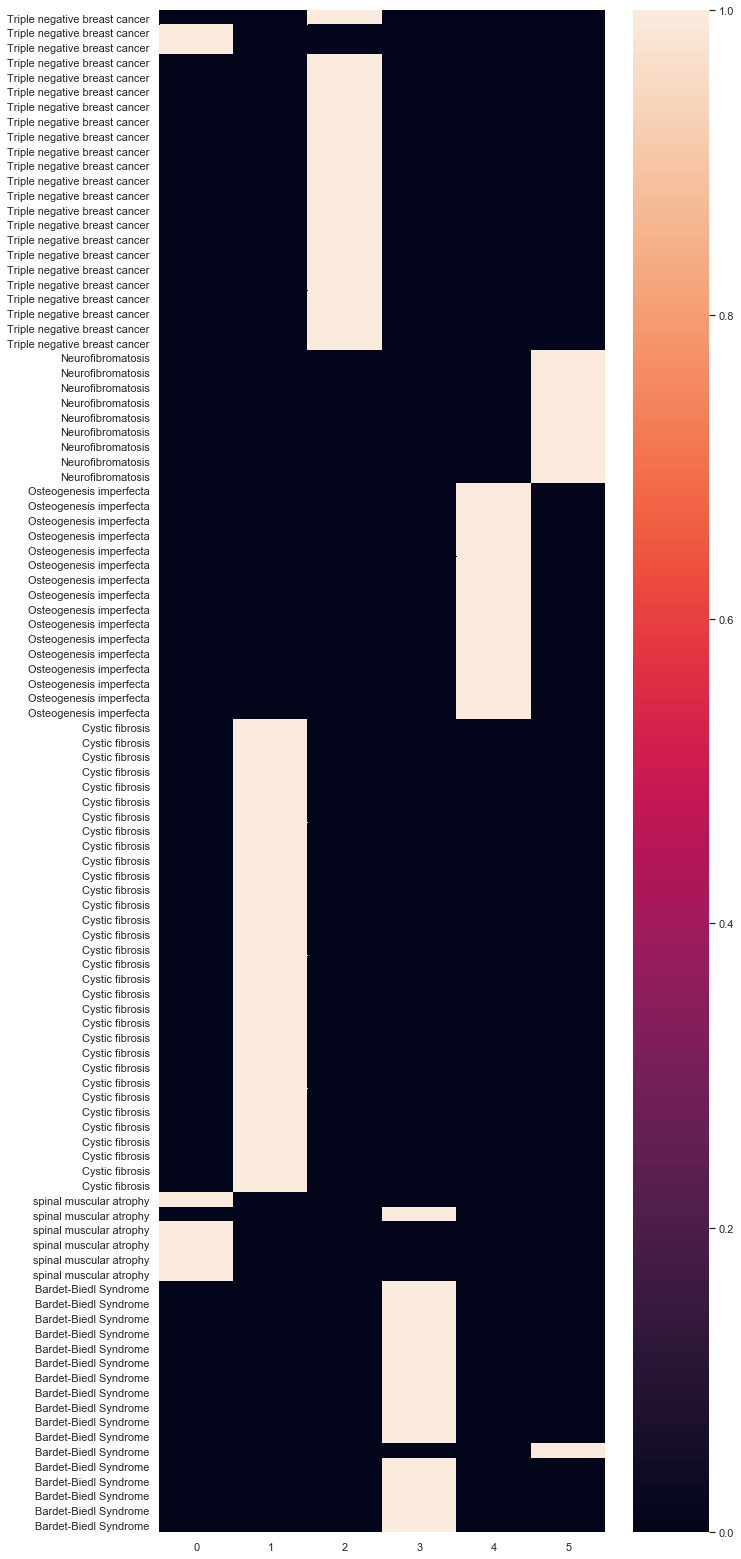

In [20]:
fig, ax = plt.subplots(figsize=(10,28))
ax = sns.heatmap(dtm, vmin=0, vmax=1, ax=ax, yticklabels=gold.topic)

# Clustering unlabed abstracts

In [21]:
test_set = pd.read_csv('../data/pmids_test_set_unlabeled.txt', sep='\t',
                             header=None, names=['pmid'])
print(test_set.shape)
test_set.head()

(77, 1)


,pmid
0,8001324
1,12598898
2,14707528
3,17047017
4,17487218


In [22]:
articles = fetch_abstracts(test_set.pmid)
len(articles)

77

## Combine title and abstract and vectorize

In [23]:
texts = [a.title + ' ' + a.abstract for a in articles]

In [24]:
vectorizer = TfidfVectorizer(max_df=0.66,
                             max_features=1000,
                             min_df=2,
                             stop_words='english')
X = vectorizer.fit_transform(texts)

In [25]:
X.shape

(77, 1000)

## Guess k using silhouette score

In [26]:
sil = []
params = [(k,i) for k in range(2,10) for i in range(7)]

for k,i in tqdm(params):
    km = KMeans(n_clusters=k,
                init='random',
                max_iter=100,
                n_init=20,
                verbose=False)
    km.fit(X)
    sil.append([k, metrics.silhouette_score(X, km.labels_, sample_size=1000)])

df_sil = pd.DataFrame(sil)

100%|██████████| 56/56 [00:32<00:00,  2.45it/s]


In [27]:
df_sil = pd.DataFrame(sil, columns=['k', 'sil'])

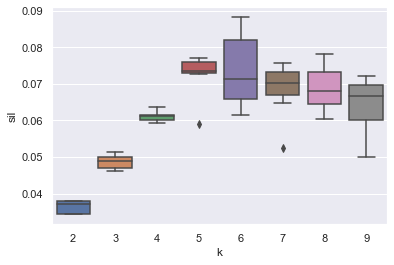

In [28]:
ax = sns.boxplot(x='k', y='sil', data=df_sil)

Judging by the inflection point, the true k is probably around 5.

## k-means clustering

In [29]:
k = 5
km = KMeans(n_clusters=k,
            init='random',
            max_iter=100,
            n_init=20,
            verbose=True)
km.fit(X)

Initialization complete
Iteration  0, inertia 118.661
Iteration  1, inertia 62.072
Iteration  2, inertia 61.574
Iteration  3, inertia 61.265
Iteration  4, inertia 60.973
Iteration  5, inertia 60.817
Converged at iteration 5: center shift 0.000000e+00 within tolerance 9.211090e-08
Initialization complete
Iteration  0, inertia 121.662
Iteration  1, inertia 63.119
Converged at iteration 1: center shift 0.000000e+00 within tolerance 9.211090e-08
Initialization complete
Iteration  0, inertia 119.621
Iteration  1, inertia 62.125
Iteration  2, inertia 61.695
Iteration  3, inertia 61.045
Iteration  4, inertia 60.706
Iteration  5, inertia 60.273
Iteration  6, inertia 59.971
Converged at iteration 6: center shift 0.000000e+00 within tolerance 9.211090e-08
Initialization complete
Iteration  0, inertia 123.105
Iteration  1, inertia 63.860
Iteration  2, inertia 63.712
Iteration  3, inertia 63.382
Iteration  4, inertia 63.113
Iteration  5, inertia 62.997
Converged at iteration 5: center shift 0.0000

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=5,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=True)

In [30]:
metrics.silhouette_score(X, km.labels_, sample_size=1000)

0.07111533501978656

In [31]:
pd.DataFrame(dict(true_label=[a.pmid for a in articles],
                  km_label=km.labels_))

,true_label,km_label
0,8001324,0
1,12598898,1
2,14707528,3
3,17047017,4
4,17487218,1
5,17708142,4
6,20351703,1
7,20578946,0
8,21263000,0
9,21706501,0


## find top 10 words by tf-idf in each cluster

In [32]:
def top(a, k=10):
    return heapq.nlargest(k, range(len(a)), a.take)

In [33]:
for ki in range(k):
    m = X[km.labels_==ki].sum(axis=0)
    top_words = [vectorizer.get_feature_names()[i] 
                     for i in top(np.squeeze(np.asarray(m)), 10)]
    print(ki, ', '.join(top_words), '\n')

0 noonan, ns, like, report, cases, primary, ras, cm, mutations, rasopathy 

1 marfan, aortic, mfs, tissue, patients, clinical, connective, tgf, fbn1, cardiovascular 

2 lung, adenocarcinoma, nipbl, cdls, expression, survival, luad, stage, cancer, classification 

3 lynch, colorectal, cancer, mmr, msi, cancers, hereditary, studies, mfs, hnpcc 

4 turner, ts, patients, girls, women, chromosome, risk, thyroid, liver, stature 

